#### Kahn's Algorithm

Topological Sort Order: [0, 1, 2, 3, 4, 5]


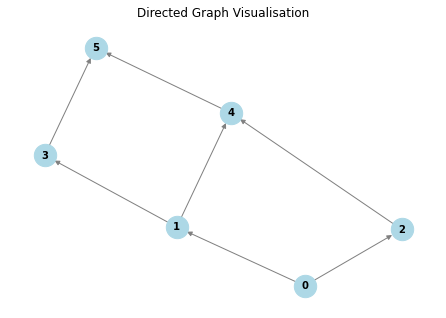

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def create_graph(vertices):
    edges = []
    adj_list = {i: [] for i in range(vertices)}
    return {"V": vertices, "edges": edges, "adj_list": adj_list}

def add_edge(graph, u, v):
    graph["edges"].append((u, v))
    graph["adj_list"][u].append(v)  # Directed edge u → v

def topological_sort(graph):
    V = graph["V"]
    in_degree = {i: 0 for i in range(V)}

    # Compute in-degree
    for u in graph["adj_list"]:
        for v in graph["adj_list"][u]:
            in_degree[v] += 1

    # Enqueue nodes with 0 in-degree
    queue = deque([node for node in in_degree if in_degree[node] == 0])
    top_order = []

    while queue:
        u = queue.popleft()
        top_order.append(u)

        for v in graph["adj_list"][u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)

    if len(top_order) == V:
        return top_order
    else:
        raise ValueError("Graph contains a cycle! Topological sorting is not possible.")

def draw_graph(graph):
    G = nx.DiGraph()  # Directed graph

    for u, v in graph["edges"]:
        G.add_edge(u, v)

    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, 
            font_size=10, font_weight='bold', edge_color='gray', arrows=True)

    plt.title("Directed Graph Visualisation")
    plt.show()

# --- Main Program ---

graph = create_graph(6)

add_edge(graph, 0, 1)
add_edge(graph, 0, 2)
add_edge(graph, 1, 3)
add_edge(graph, 1, 4)
add_edge(graph, 2, 4)
add_edge(graph, 3, 5)
add_edge(graph, 4, 5)

# Perform Topological Sort
try:
    topo_order = topological_sort(graph)
    print(f"Topological Sort Order: {topo_order}")
except ValueError as e:
    print(e)

# Draw the graph
draw_graph(graph)
